In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [2]:

cap = cv2.VideoCapture('../DATA/student_capture_car_detection.mp4')
fps = 30
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. /n")

Error opening the video file. Please double check your file path for typos. /n


In [3]:
haarcascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [4]:

x,w,y,h = -1,-1,-1,-1
def detect_plate(vid):
    global x,w,y,h
    # detect_vid = vid.copy()
    
    number_rects = haarcascade.detectMultiScale(vid)
    
    for i, number_rect in enumerate(number_rects):
        if i == len(number_rects) - 1:
            break
        x, y, w, h = number_rect
        cv2.rectangle(vid, (x,y), (x+w,y+h),(255,0,0),3)
    
    # for (x,y,w,h) in number_rects[:len(number_rects-2)]:
    #     cv2.rectangle(detect_img, (x,y), (x+w,y+h),(255,0,0),3)
    #     break
        
        
    return vid

In [5]:
result = detect_plate(cap)


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - image is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'image'


In [6]:
def detect_and_blur_plate(vid):
    # roi = img[y:y+h,x:x+w] 
    # final = cv2.medianBlur(roi, 7)
    # l = img
    # s = final
    # l[y:y+h, x:x+w] = s
    
    detect_img = vid.copy()
    l = detect_img
    number_rects = haarcascade.detectMultiScale(detect_img)
    for i, number_rect in enumerate(number_rects):
        if i == len(number_rects) - 1:
            break
        x, y, w, h = number_rect
        roi = detect_img[y:y+h,x:x+w] 
        final = cv2.medianBlur(roi, 11)
        # l = img
        s = final
        l[y:y+h, x:x+w] = s
    
    return l
    

In [10]:
result = detect_and_blur_plate(cap)

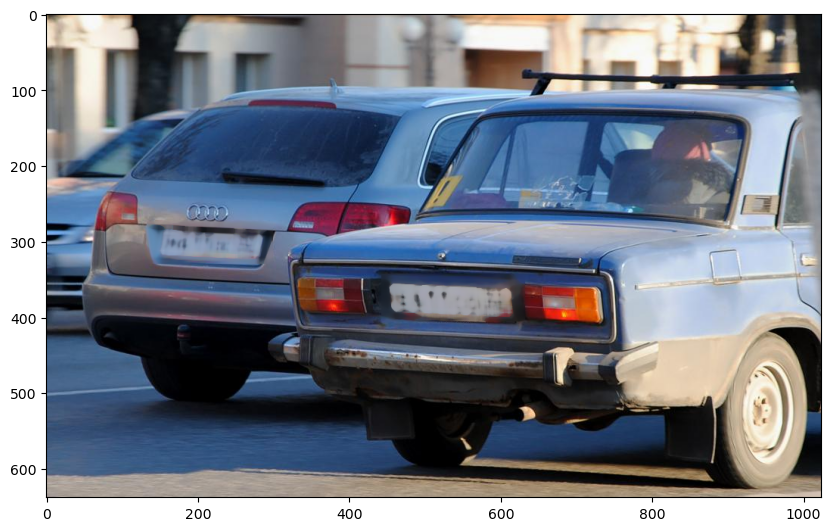

In [ ]:
while cap.isOpened():         
    # Read the video file.
    ret, frame = cap.read()
    result = detect_and_blur_plate(cap)
    # If we got frames, show them.
    if ret == True:             
        
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        time.sleep(1/fps)
        cv2.imshow('frame',frame)
 
        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):            
            break 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

In [31]:
import cv2
import numpy as np

#numberPlateCascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
plat_detector =  cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
video = cv2.VideoCapture('../DATA/autos1_resized.mp4')

if(video.isOpened()==False):
    print('Error Reading Video')

while True:
    ret,frame = video.read()    
    gray_video = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plate = plat_detector.detectMultiScale(gray_video,scaleFactor=1.2,minNeighbors=5,minSize=(25,25))

    for (x,y,w,h) in plate:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0),2)
        frame[y:y+h,x:x+w] = cv2.blur(frame[y:y+h,x:x+w],ksize=(10,10))
        cv2.putText(frame,text='License Plate',org=(x-3,y-3),fontFace=cv2.FONT_HERSHEY_COMPLEX,color=(0,0,255),thickness=1,fontScale=0.6)
        
         
    if ret == True:
        
        cv2.imshow('Video', frame)

        if cv2.waitKey(25) & 0xFF == ord("q"):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()      

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


# plat_detector =  cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
plat_detector = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')
video = cv2.VideoCapture('../DATA/autos1_resized.mp4')


width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter('../DATA/student_capture_hw3_car_detection.mp4', cv2.VideoWriter_fourcc(*'XVID'),25, (width, height))

if(video.isOpened()==False):
    print('Error Reading Video')
    

while True:
    ret,frame = video.read()    
    # gray_video = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    norm_video = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plate = plat_detector.detectMultiScale(norm_video)

    for (x,y,w,h) in plate:
        # cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0),2)
        roi = frame[y:y+h,x:x+w] 
        final = cv2.medianBlur(roi, 11)
        s = final
        frame[y:y+h, x:x+w] = s
        # frame[y:y+h,x:x+w] = cv2.blur(frame[y:y+h,x:x+w],ksize=(10,10)        
         
    if ret == True:
        
        writer.write(frame)

        cv2.imshow('Video', frame)

        if cv2.waitKey(25) & 0xFF == ord("q"):
            break
    else:
        break

video.release()
writer.release()
cv2.destroyAllWindows() 